# Cleaning Astronomical Datasets

I have posed two problems for you to work on in this hands-on exercise.  

- Concept drift: Do the training and test set distributions differ?
- Find mislabeled examples in the labeled ZTF data provided

More information for each is provided below.  You may want or need to cut and paste code from your other notebooks.  But first...


### 0a. Imports

These are all the imports that will be used in this notebook.  All should be available in the DSFP conda environment.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
# You can add anything you need as you work

### 0b. Data Location

We will use the same data from the Day 2 clustering exercise (see [that notebook](https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/master/Session7/Day2/Clustering-Astronomical-Sources.ipynb) to download the data).

Please specify paths for the following:

In [3]:
F_META = '../Day2/data/dsfp_ztf_meta.npy'
F_FEATS = '../Day2/data/dsfp_ztf_feats.npy'
D_STAMPS = '../Day2/data/dsfp_ztf_png_stamps'

### 0c. Load Data

In [4]:
meta_np = np.load(F_META)
feats_np = np.load(F_FEATS)

COL_NAMES = ['diffmaglim', 'magpsf', 'sigmapsf', 'chipsf', 'magap', 'sigmagap',
             'distnr', 'magnr', 'sigmagnr', 'chinr', 'sharpnr', 'sky',
             'magdiff', 'fwhm', 'classtar', 'mindtoedge', 'magfromlim', 'seeratio',
             'aimage', 'bimage', 'aimagerat', 'bimagerat', 'elong', 'nneg',
             'nbad', 'ssdistnr', 'ssmagnr', 'sumrat', 'magapbig', 'sigmagapbig',
             'ndethist', 'ncovhist', 'jdstarthist', 'jdendhist', 'scorr', 'label']

# NOTE FROM Umaa: I've decided to eliminate the following features. Dropping them.
#
COL_TO_DROP = ['ndethist', 'ncovhist', 'jdstarthist', 'jdendhist', 
               'distnr', 'magnr', 'sigmagnr', 'chinr', 'sharpnr', 
               'classtar', 'ssdistnr', 'ssmagnr', 'aimagerat', 'bimagerat', 
               'magapbig', 'sigmagapbig', 'scorr']
feats_df = pd.DataFrame(data=feats_np, index=meta_np['candid'], columns=COL_NAMES)
feats_df.drop(columns=COL_TO_DROP, inplace=True) 
print("There are {} columns left.".format(len(feats_df.columns)))
print("They are: {}".format(list(feats_df.columns)))
#feats_df.describe()

There are 19 columns left.
They are: ['diffmaglim', 'magpsf', 'sigmapsf', 'chipsf', 'magap', 'sigmagap', 'sky', 'magdiff', 'fwhm', 'mindtoedge', 'magfromlim', 'seeratio', 'aimage', 'bimage', 'elong', 'nneg', 'nbad', 'sumrat', 'label']


## 1. Concept Drift

In the last exercise, you created a training and test set for the purposes of building a classifier.  The goal of this exercise is to note any changes in the feature distributions for these two sets.

Per feature, can you:

- plot test vs. train distributions for both real and bogus, and note areas that does not overlap
- quantiatively measure this using [Kullback-Leibler divergence](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html), and print or plot the scores for all features.

Which feature exhibits the most drift between train and test?

In [8]:
feats_plus_label = np.array(feats_df)
nids = meta_np['nid']
# INSTRUCTION: nid.npy contains the nids for this labeled data.
# Split the data into separate data structures for train/test data at nid=550.
# Verify that you have at least 500 reals in your test set.
train_df = feats_df[nids<=550]
test_df = feats_df[nids>550]
# INSTRUCTION: Separate the labels from the features
y_train = np.array(train_df.label)
y_test = np.array(test_df.label)
exc_cols = ['label','nbad','seeratio']
X_train = train_df.drop(columns=exc_cols)
X_test = test_df.drop(columns=exc_cols)

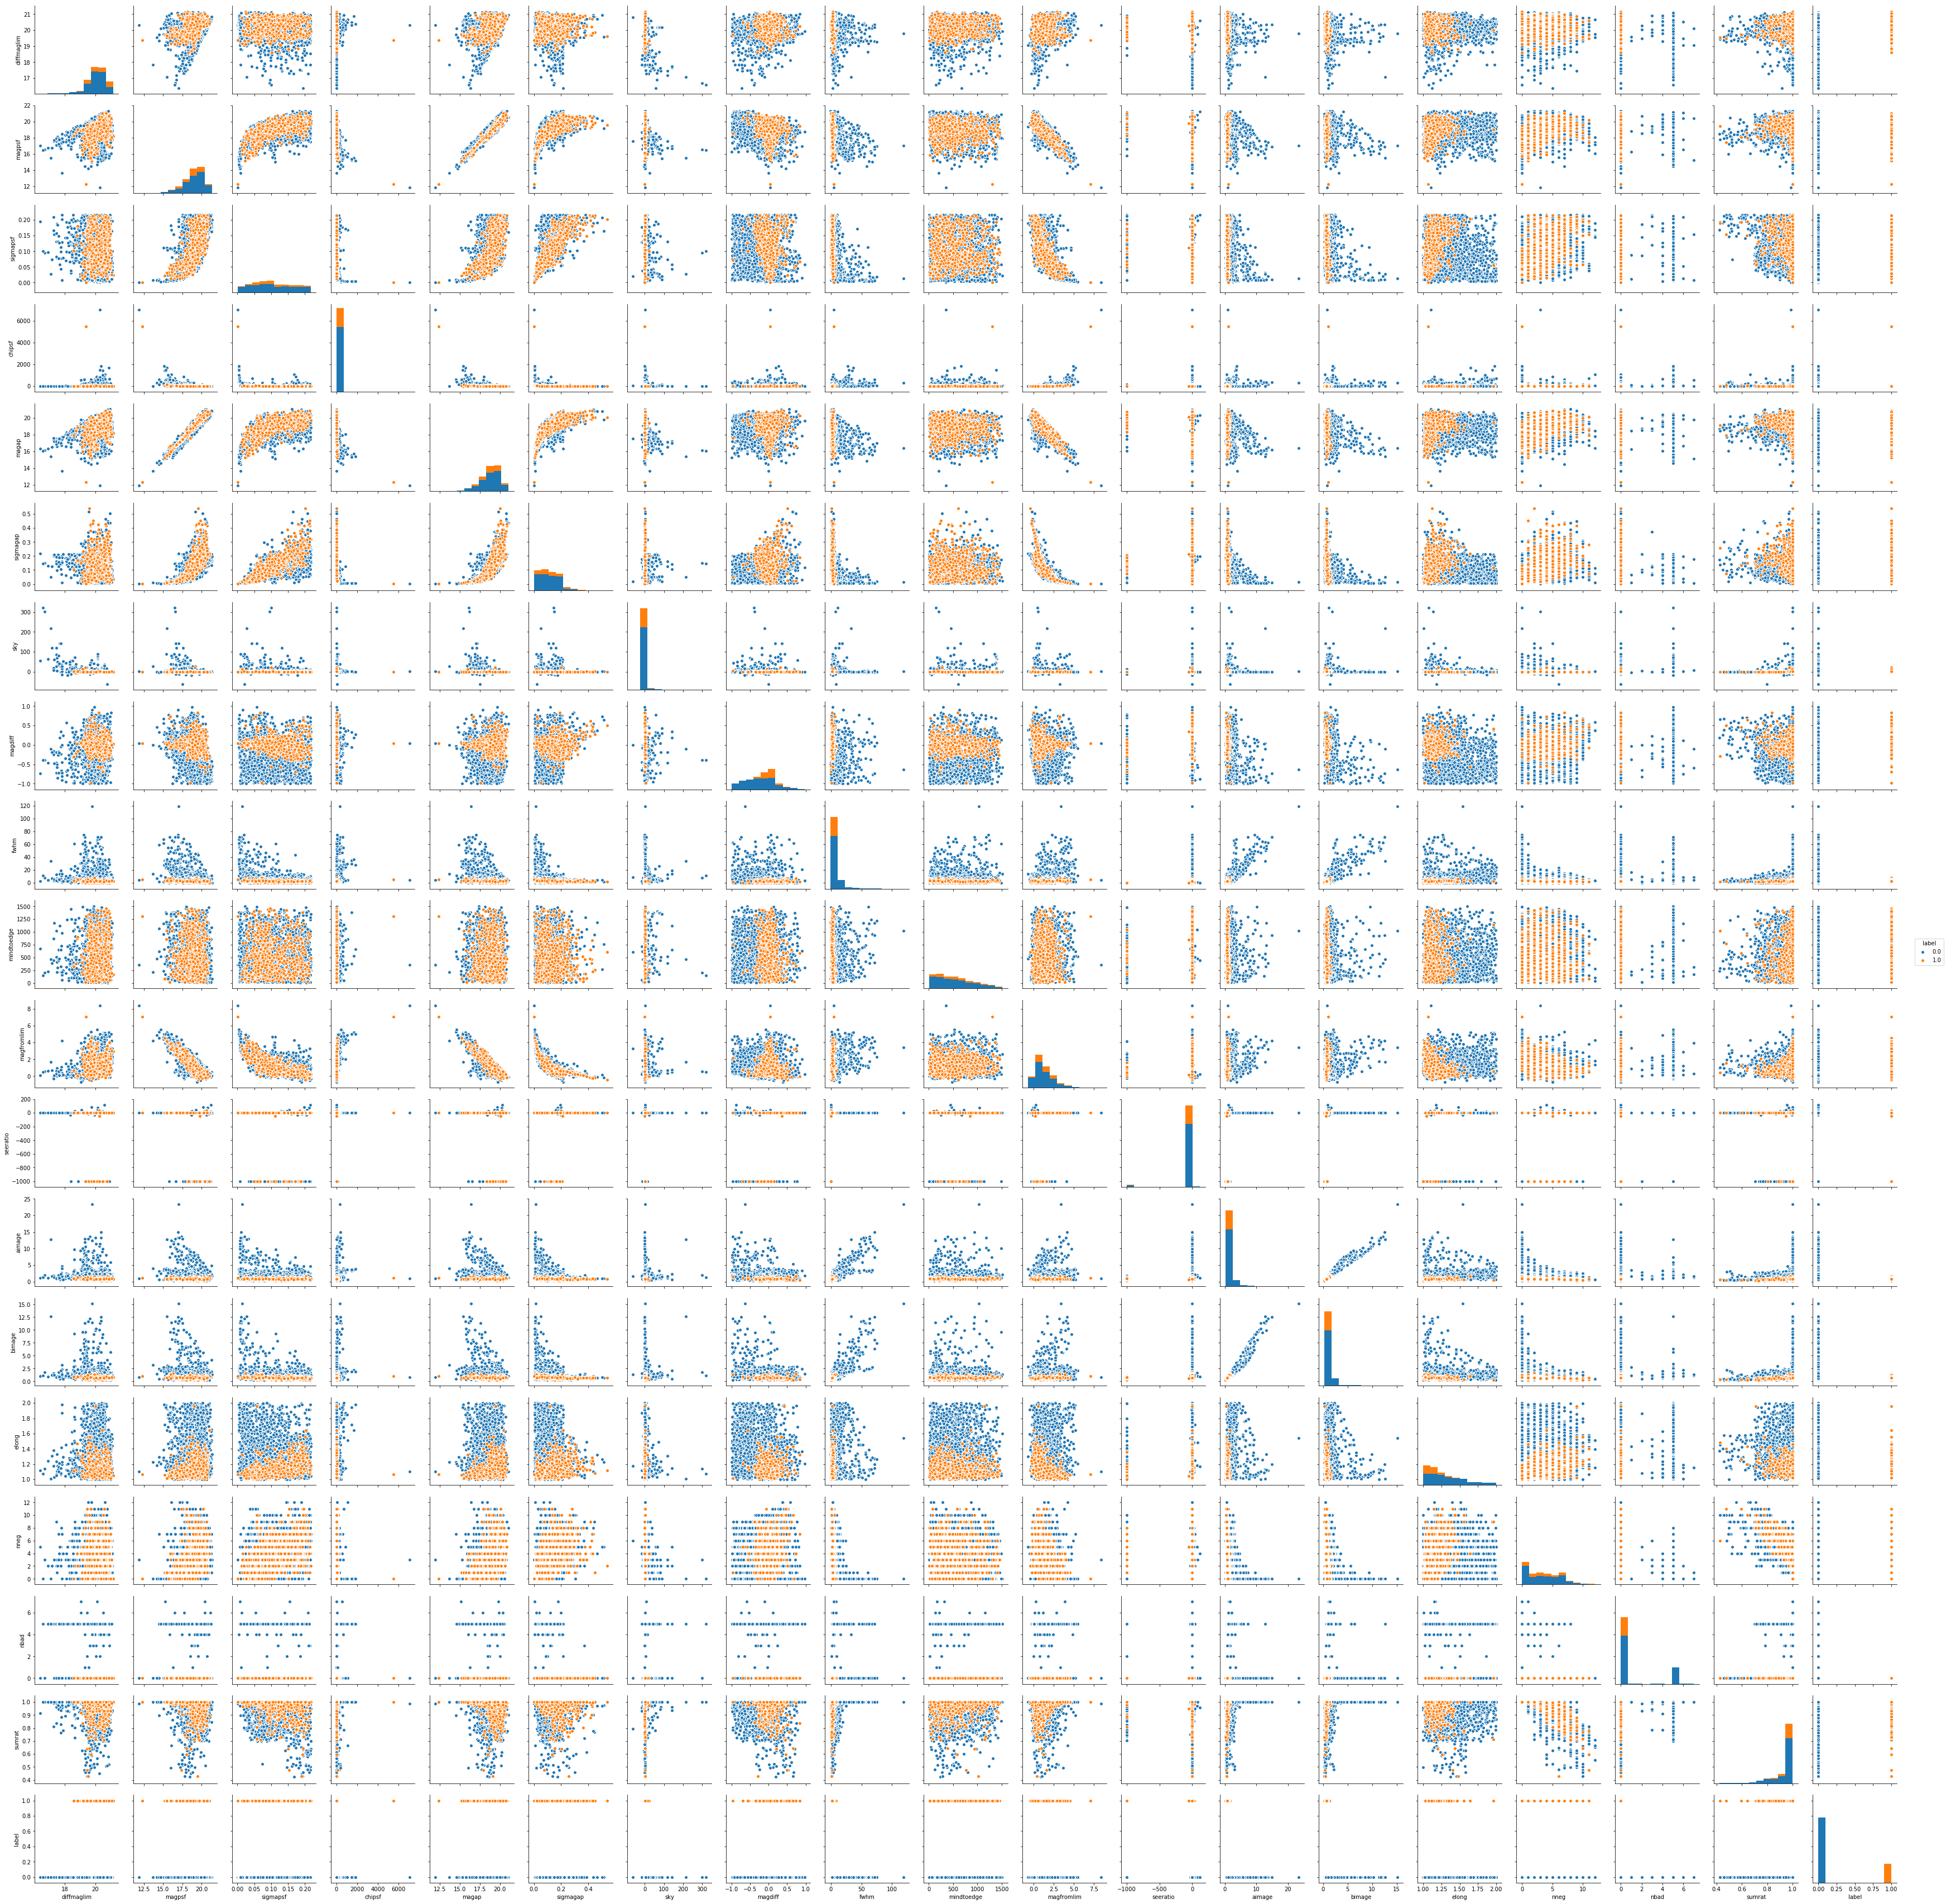

In [28]:
import seaborn as sns
sns.pairplot(train_df,hue = 'label', diag_kind = 'hist')


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(feats_df.drop(columns=exc_cols))
X_train = scaler.transform(train_df.drop(columns=exc_cols))
X_test = scaler.transform(test_df.drop(columns=exc_cols))

In [39]:
real_train = X_train[y_train==1]
real_test = X_test[y_test==1]

In [44]:
def plot_hist_feature(feature,data1,data2,bins=100,xscale='linear',yscale='linear',l1='Test',l2='Train'):
    plt.hist(data1, bins,alpha=0.5)
    plt.hist(data2,bins,alpha=0.5)
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.title(feature)
    plt.legend([l1,l2])
    plt.show()

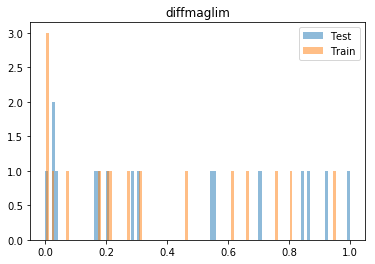

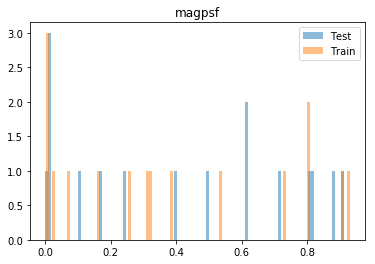

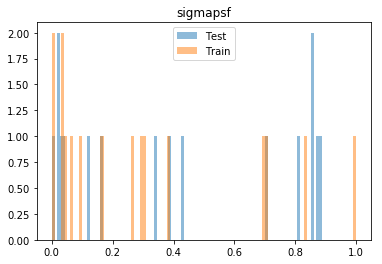

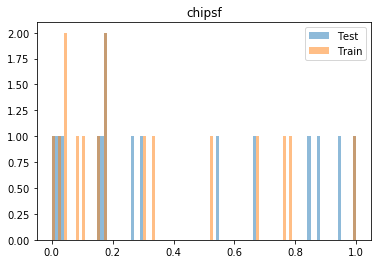

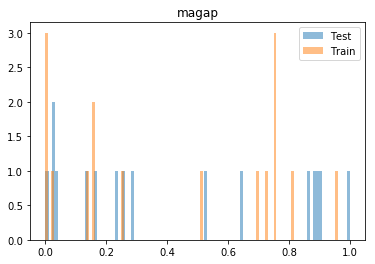

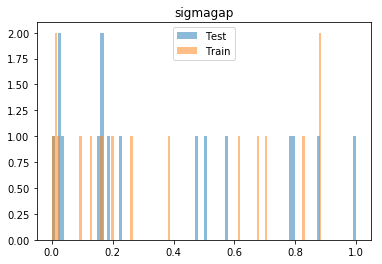

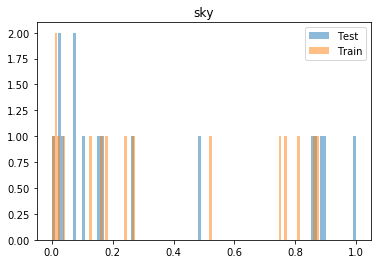

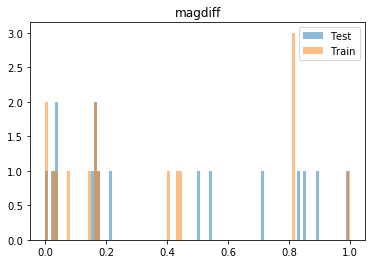

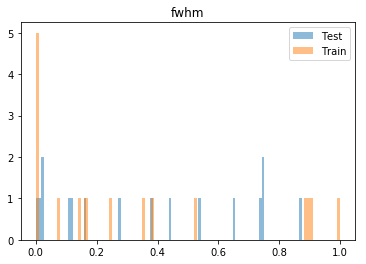

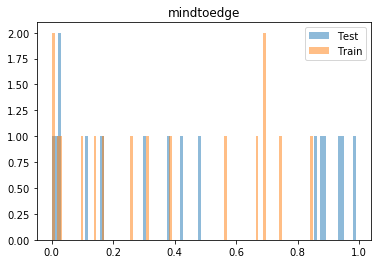

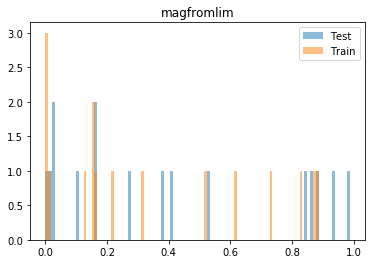

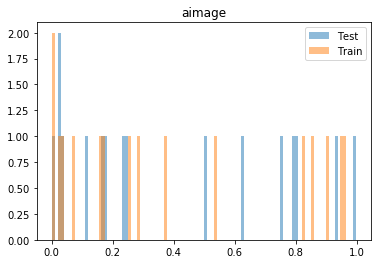

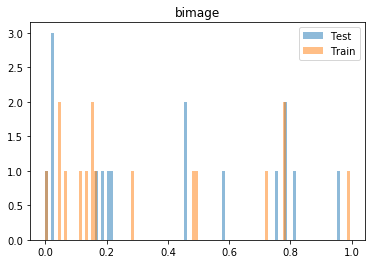

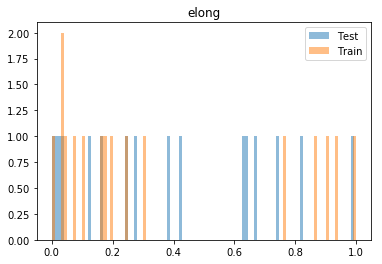

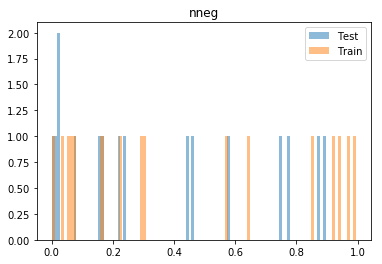

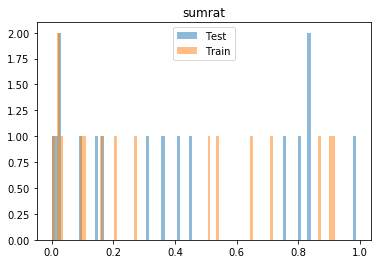

In [46]:
for i,col in enumerate(train_df.drop(columns=exc_cols).columns):
    plot_hist_feature(col,real_test[i],real_train[i])

In [52]:
bogus_train = X_train[y_train==0]
bogus_test = X_test[y_test==0]
bogus_train.shape

(2013, 16)

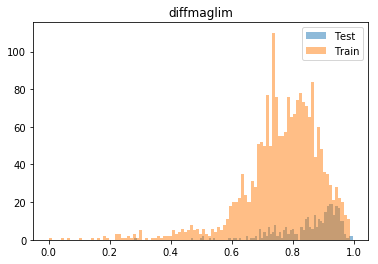

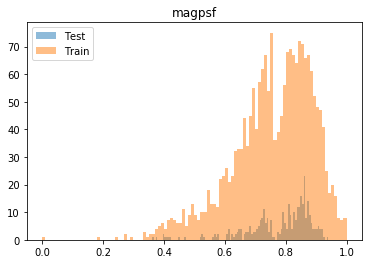

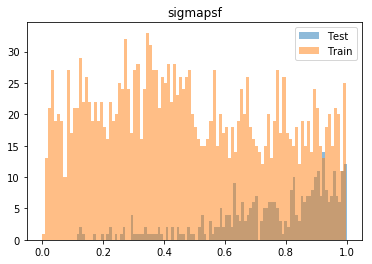

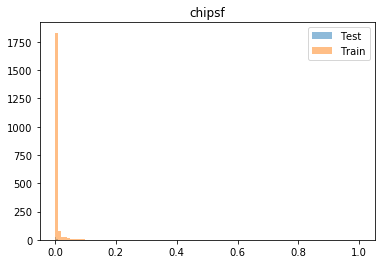

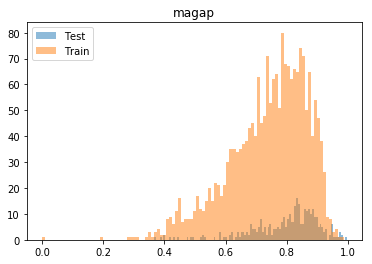

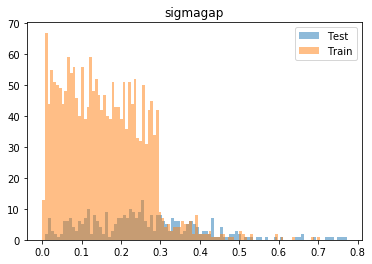

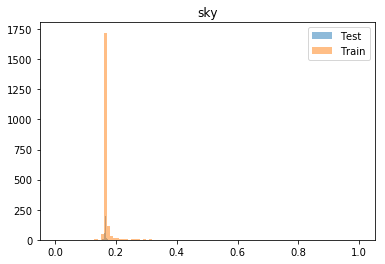

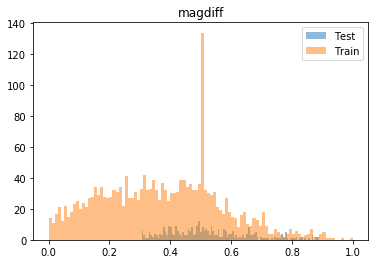

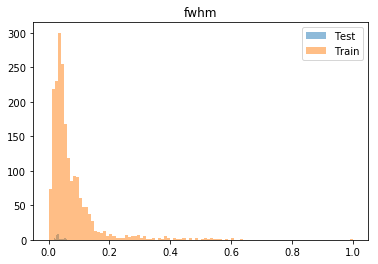

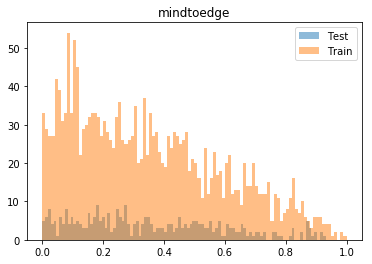

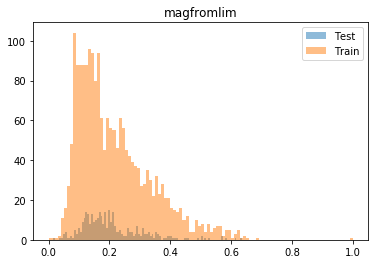

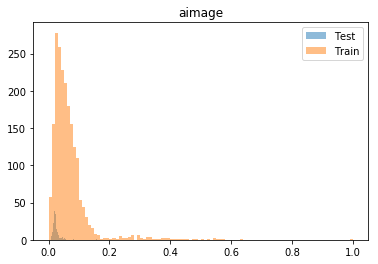

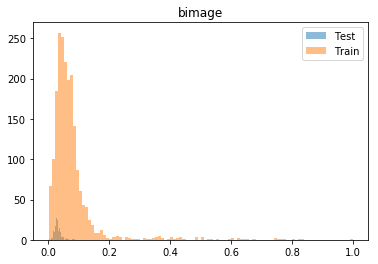

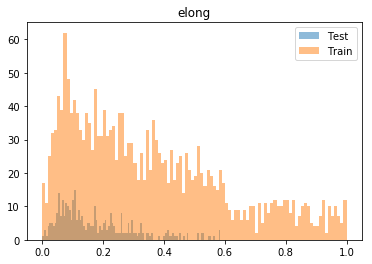

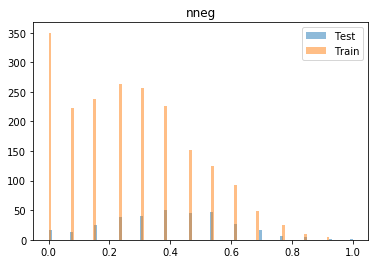

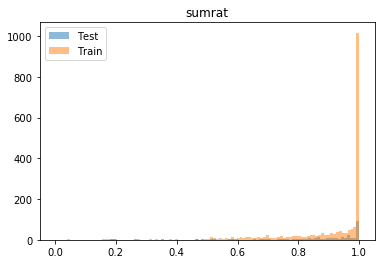

In [51]:
for i,col in enumerate(train_df.drop(columns=exc_cols).columns):
    plot_hist_feature(col,bogus_test[:,i],bogus_train[:,i])

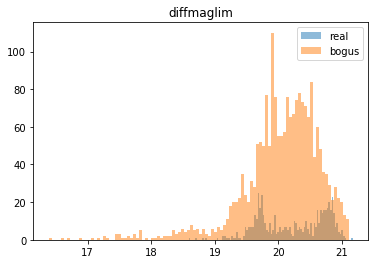

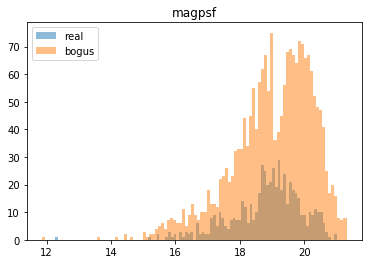

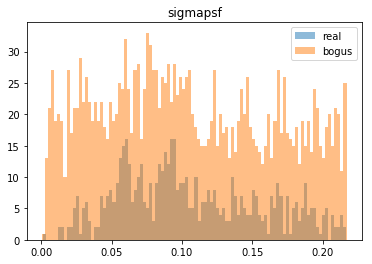

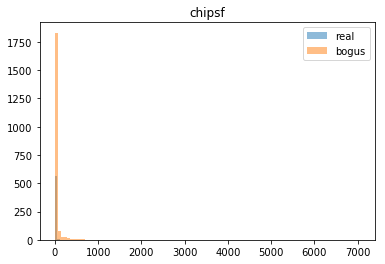

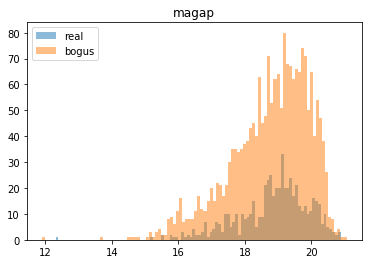

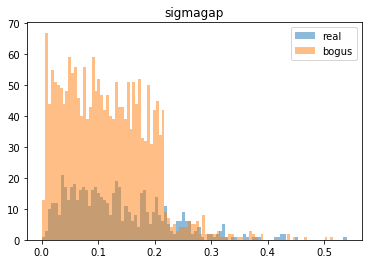

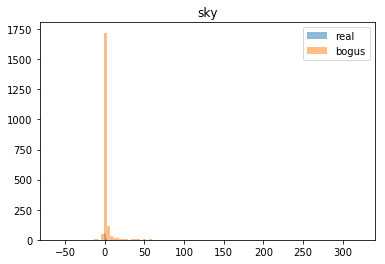

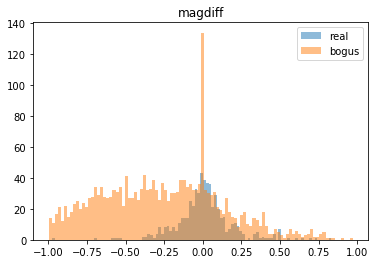

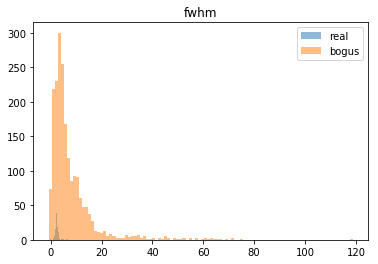

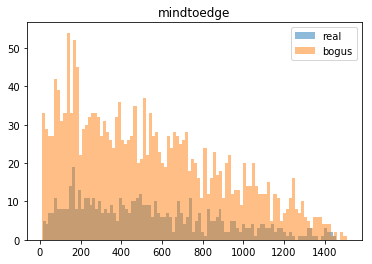

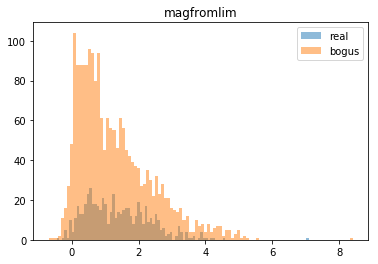

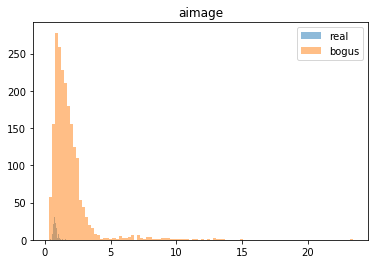

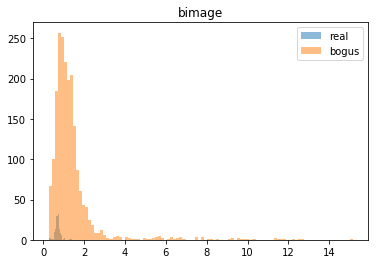

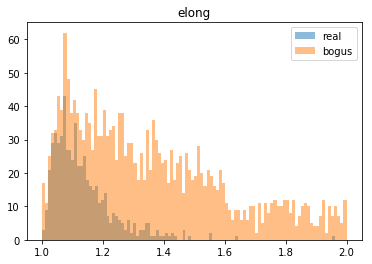

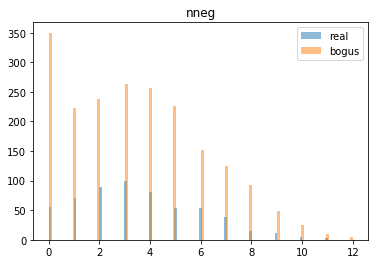

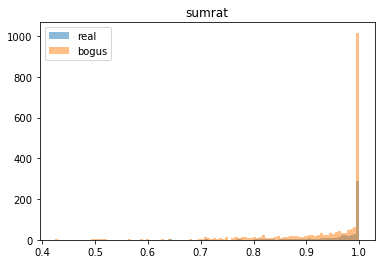

In [22]:
for col in real_train.columns:
    plot_hist_feature(col,real_train,bogus_train,l1='real',l2='bogus')

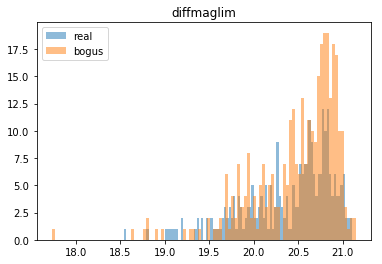

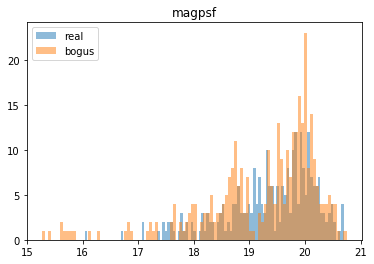

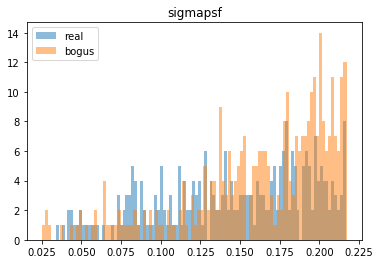

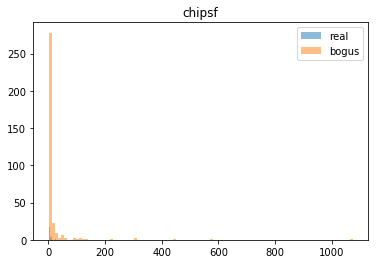

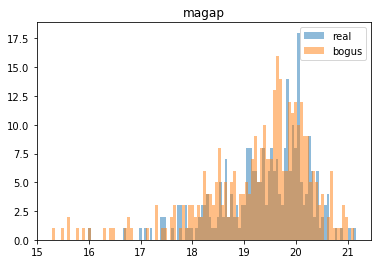

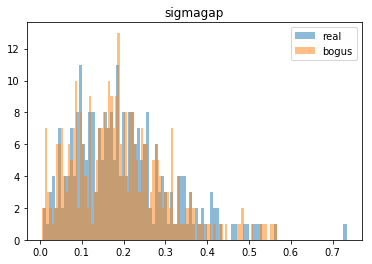

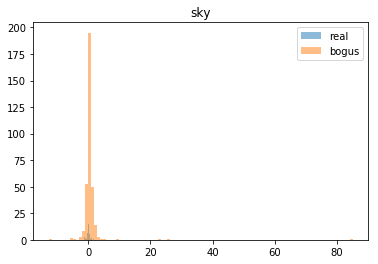

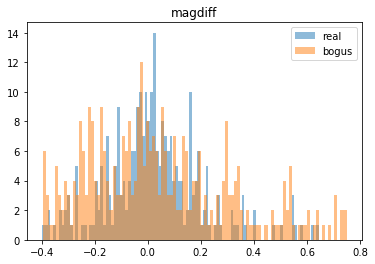

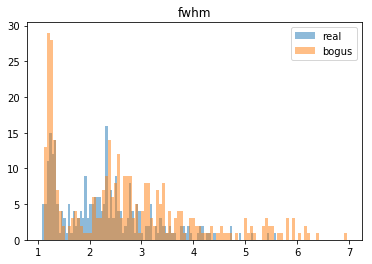

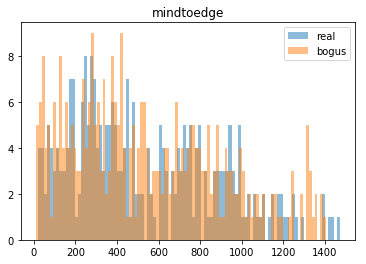

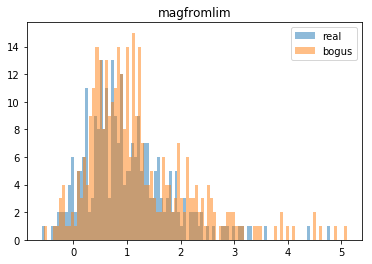

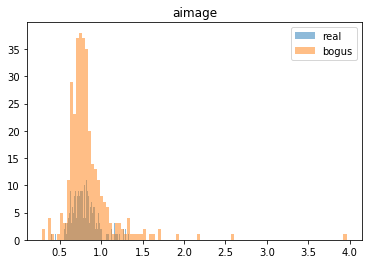

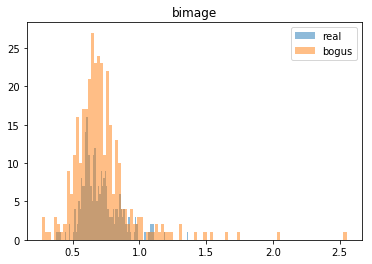

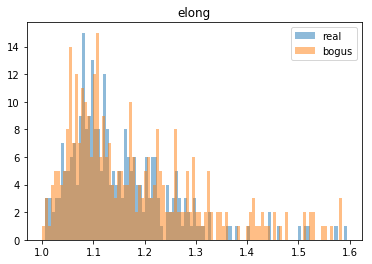

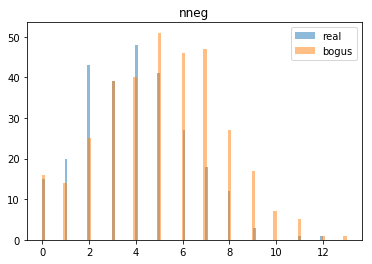

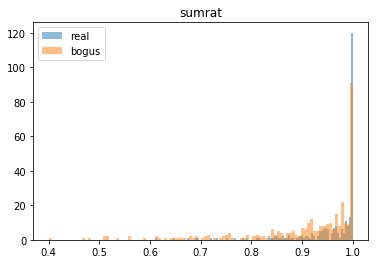

In [25]:
for col in real_train.columns:
    plot_hist_feature(col,real_test,bogus_test,l1='real',l2='bogus')

In [54]:
len(bogus_train[:,0])

2013

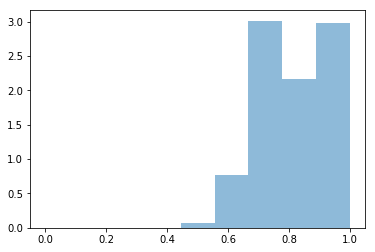

In [66]:
bins=np.linspace(0,1,10)
hist = plt.hist(real_train[:,0], bins=bins,alpha=0.5,normed=True)

In [59]:
hist[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,
         1.,   3.,   1.,   1.,   0.,   0.,   3.,   2.,   2.,   0.,   3.,
         3.,   2.,   5.,   5.,   4.,   7.,   4.,   4.,   8.,   4.,   6.,
         7.,   6.,   4.,  13.,   4.,   6.,   3.,   6.,  10.,  13.,  16.,
        15.,  11.,  14.,  19.,  15.,  10.,   7.,  11.,   4.,   2.,   0.])

In [60]:
from scipy.stats import entropy

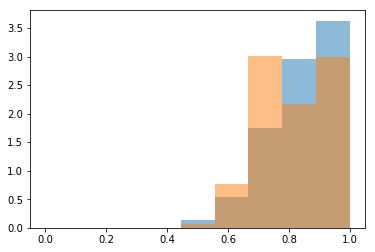

0.0691777618589


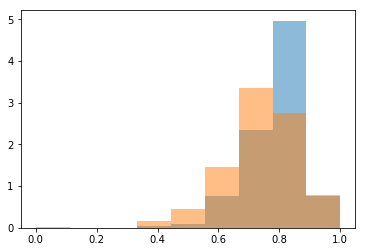

inf


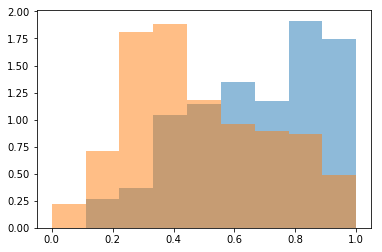

inf


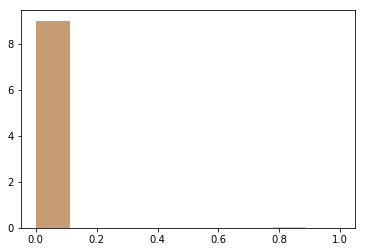

inf


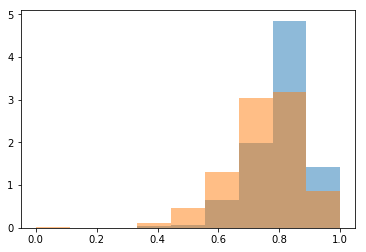

inf


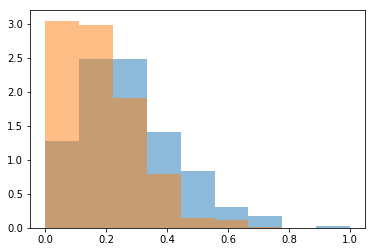

0.204470843515


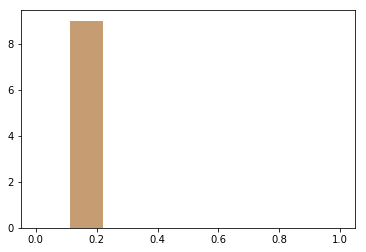

0.0


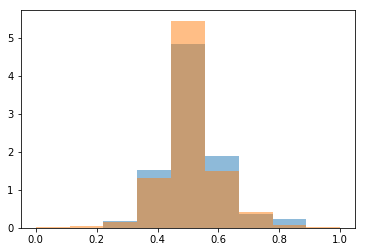

inf


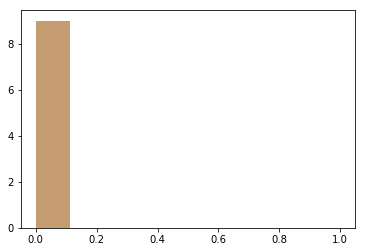

0.0


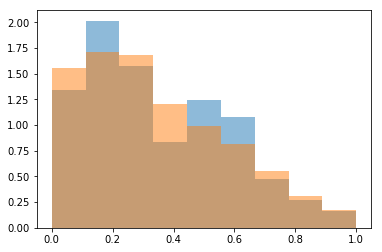

0.020699376995


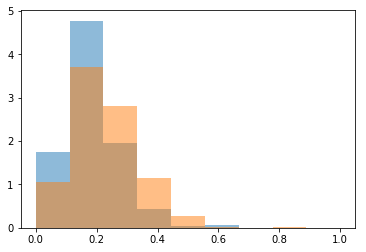

inf


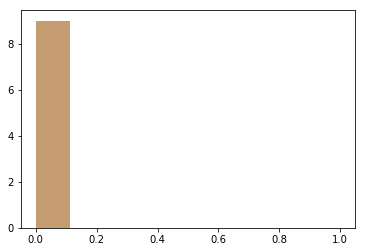

0.0


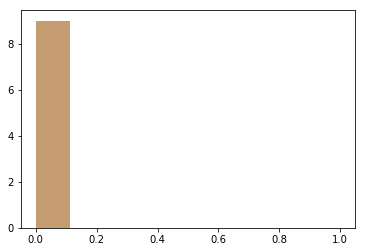

0.0


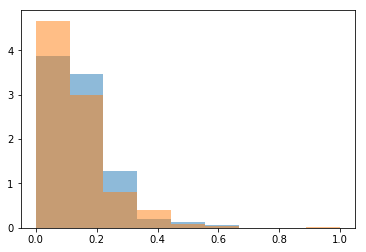

inf


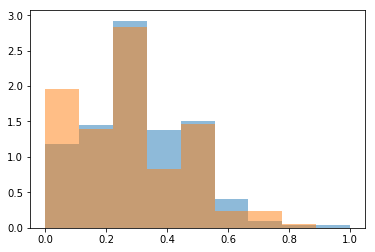

0.0544715254161


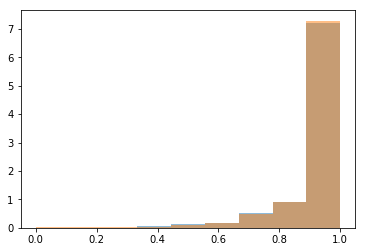

inf


In [69]:
bins=np.linspace(0,1,10)
for i in range(len(real_test[0])):
    qk = plt.hist(real_test[:,i], bins=bins,alpha=0.5,normed=True)[0]
    pk = plt.hist(real_train[:,i], bins=bins,alpha=0.5,normed=True)[0]
    plt.show()
    print(entropy(pk,qk))

## 2. Finding Mislabeled Examples

This task ties together the work you did for the unsupervised and supervised exercises.  Here's how to get started.

1. Cluster the entire labeled set provided to you.  How you choose to do the clustering is up to you.  I would recommend getting your clustering results into a two dimensional space that you can plot, but this is not strictly necessary.

2. Apply the labels to the clusters you've created and plot them.  If you're working in a >=3-dimensional space, find a way to print the candids in each cluster.  You can sort the list by examples that are closet to the centroids, and print their associated labels.

3. Look at some postage stamps of examples you suspect are mislabeled.  Can you devise a simple way to identify a set of mislabeled examples?  Can you come up with an estimate of how many examples are mislabeled?